In [1]:
include("..//src//HermiteFEM.jl");

In [2]:
case::Case = Case();
@time u::Vector{Float64} = solve(case);

  0.321360 seconds (85.70 k allocations: 27.482 MiB, 5.56% gc time, 26.02% compilation time)


In [3]:
import PyPlot as plt;

function analytical_theta(x::Float64)::Float64
    theta::Float64 = 0.;
    if 0 <= x < 0.12
        theta = -0.00419174*x^3 - 0.999404*x^2 + 0.243843*x;
    elseif 0.12 <= x <= 0.24
        theta = -5.38543 * x^2 + 1.31177 * x - 0.0649994;
    else
        theta = 0.;
    end
    return theta;
end

function analytical_w(x::Float64)::Float64
    w::Float64 = 0.;
    if 0 <= x < 0.12
        w = -0.00104793 * x^4 - 0.333135 * x^3 + 0.121922 * x^2;
    elseif 0.12 <= x <= 0.24
        w = -1.79514 * x^3 + 0.655884 * x^2 - 0.0649994 * x + 0.00263701;
    else
        w = 0.;
    end
    return w;
end

x_analytical::Vector{Float64} = Vector(0.: 0.001: 0.24);
theta_analytical::Vector{Float64} = analytical_theta.(x_analytical);
w_analytical::Vector{Float64} = analytical_w.(x);

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


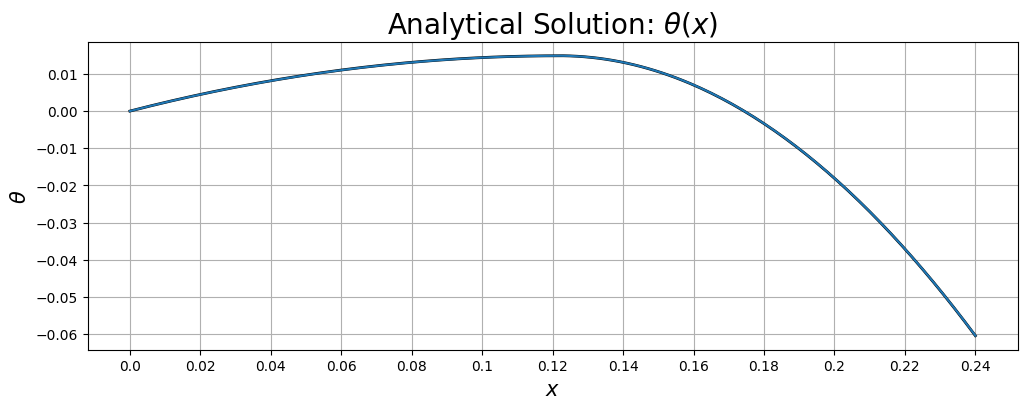

In [4]:
plt.figure(figsize=(12, 4), facecolor="white");
plt.plot(x, theta_analytical, color="k", lw=2);
plt.grid(true);
plt.xticks(0: 0.02: 0.24, 0: 0.02: 0.24);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$\\theta\$", fontsize=15);
plt.title("Analytical Solution: \$\\theta(x)\$", fontsize=20);
plt.plot(case.x, u[2:2:end]);
# plt.savefig("..//image//analytical_theta.png", bbox_inches="tight");
# plt.savefig("..//image//analytical_theta.pdf", bbox_inches="tight");
plt.show()

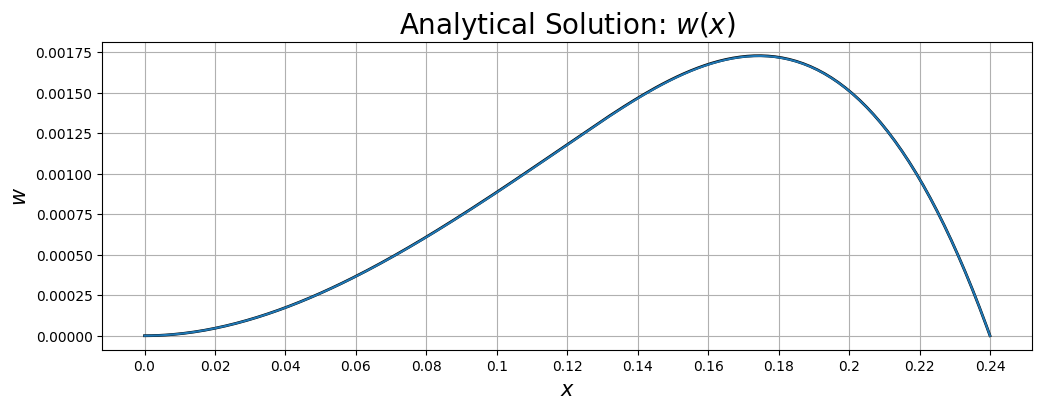

In [5]:
plt.figure(figsize=(12, 4), facecolor="white");
plt.plot(x, w_analytical, color="k", lw=2);
plt.grid(true);
plt.xticks(0: 0.02: 0.24, 0: 0.02: 0.24);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$w\$", fontsize=15);
plt.title("Analytical Solution: \$w(x)\$", fontsize=20);
plt.plot(case.x, u[1:2:end])
# plt.savefig("..//image//analytical_w.png", bbox_inches="tight");
# plt.savefig("..//image//analytical_w.pdf", bbox_inches="tight");
plt.show()

In [6]:
case.x

10001-element Vector{Float64}:
 0.0
 2.4e-5
 4.8e-5
 7.199999999999999e-5
 9.6e-5
 0.00012
 0.00014399999999999998
 0.000168
 0.000192
 0.000216
 0.00024
 0.000264
 0.00028799999999999995
 ⋮
 0.239736
 0.23976
 0.239784
 0.239808
 0.239832
 0.23985599999999999
 0.23988
 0.239904
 0.239928
 0.239952
 0.239976
 0.24